                 Borough  Avg_over_20_Yrs_In_$
0   Kensington & Chelsea              873957.0
1            Westminster              643508.0
2                 Camden              551111.0
3   Hammersmith & Fulham              519666.0
4         City of London              503195.0
5   Richmond upon Thames              446261.0
6              Islington              430415.0
7             Wandsworth              403309.0
8           Inner London              372209.0
9                 Barnet              356534.0
10              Haringey              344934.0
11               Hackney              340177.0
12               Lambeth              329978.0
13                Merton              329873.0
14  Kingston upon Thames              328961.0
15             Southwark              325882.0
16                Ealing              320692.0
17                 Brent              318150.0
18                Harrow              313393.0
19                LONDON              311594.0
20         To

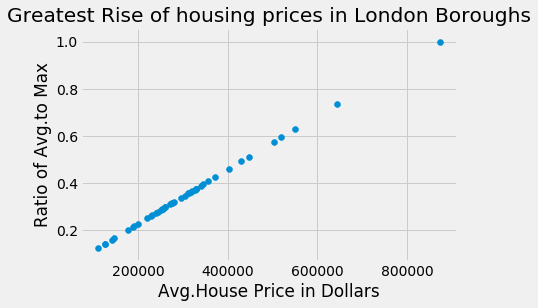

                Boroughs  Avg_Over_20_Yrs  Avg_To_max
0   Kensington & Chelsea         873957.0    1.000000
1            Westminster         643508.0    0.736315
2                 Camden         551111.0    0.630593
3   Hammersmith & Fulham         519666.0    0.594613
4         City of London         503195.0    0.575766
5   Richmond upon Thames         446261.0    0.510621
6              Islington         430415.0    0.492490
7             Wandsworth         403309.0    0.461475
8           Inner London         372209.0    0.425889
9                 Barnet         356534.0    0.407954
10              Haringey         344934.0    0.394681
11               Hackney         340177.0    0.389238
12               Lambeth         329978.0    0.377568
13                Merton         329873.0    0.377448
14  Kingston upon Thames         328961.0    0.376404
15             Southwark         325882.0    0.372881
16                Ealing         320692.0    0.366943
17                 Brent    

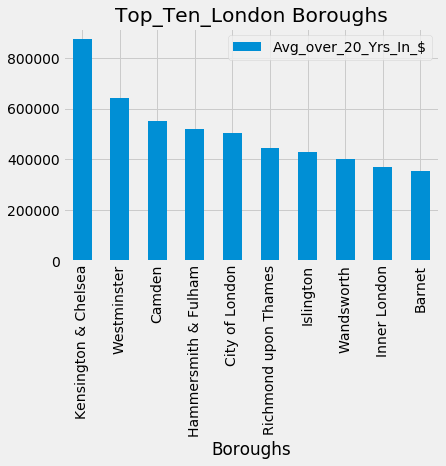

In [1]:

     ### London_Housing
     ### Adi Tonangi
     ### Request: which boroughs of Metro London have seen the 
     ### greatest increase in housing prices,on average, over the 
     ### last two decades(2000-03-01 thru 2020-03-01)

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

     ### Step-1.... get data from https: site in UK
url_LondonHousePrices = ('https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls')
     ### df = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
df = pd.read_excel(url_LondonHousePrices, sheet_name='Average price') 
     ### print(df.shape, '<--  right after df from uk website')
     ###print(df.head(30), '<--  Head(30) right after df from uk website')
     ### print(df.tail(30), '<--  tail(30) right after df from uk website')
     
     ### Step-2....Select for the past 20 years : 2000-03=01 thru 2020-03-01
     ### (304 rows/Monthly Avg,Price, 49 columns/Boroughs) with NaNs
df1 = df.iloc[63:304, 0:] 
     ### print(df1.shape, '<--shape right after selected for the past 20 years')
     ### print(df1.head(30),'<--  head(30) right  after selected for 20 years')
     ###print(df.tail(30), '<--  tail(30) right after selected for 20 years ')
     ### All 49 (columns : boroughs ) selected ( some NaNs )

        
     ### Step-3....Tranpose rows into columns & columns into rows
     ### and drop those columns before period of interest(before 20000--3-01
df1_T = df.T  ### transposed
df2_T = df1_T.drop(df1_T.iloc[:, 1:63], axis = 1) 
     ### removes rows and columns with NaN(missing) values.
     ### print(duplicatedRows)  ### no duplicate rows found
     ### print(df2_T.isna().sum(),'<--print(df2_T.isna().sum()')  ### NaNs
     ### print(df2_T.isnull().sum(),'<--print(df2_T.isnull().sum()') ### Nulls
df3_T = df2_T.dropna(how='any')     
     ### print(df3_T.shape, '<-- Shape After Transpose & all drops' )
     ### print(df3_T.head(30), '<-- head(30) After Transpose & drops')
     ### print(df3_T.columns, '<--tail(30) After Transpose & all drops')                    
 
    ### Step-4 get the mean prices for past 20 years sorted and rounded
mean241 = df3_T.iloc[ :, 1:242].mean(axis=1)
mean241s = mean241.sort_values(ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
mean241sr = round(mean241s,0) ### sorted & rounded
mean241sr = mean241sr.reset_index()
mean241sr.columns = ["Borough", "Avg_over_20_Yrs_In_$"]
print(mean241sr, '<--print(mean241sr')
    ### Mean prices over 20 years sorted,rounded and saved/exported
mean241sr.to_csv("Boroughs_Meansr.csv", index=False)

def scatter_plot_Avg_To_Max():
    import pandas as pd
    import matplotlib.pyplot as plt
    df = pd.read_csv("Boroughs_Meansr_With_Avg_To_max.csv" )
        ### print(df.head(50), '<-- print(df.head(50)')
    df = df.drop(df.loc[:, df.columns.str.contains('Unnamed: 0') ], axis=1,inplace=False)    
    df.columns = ["Boroughs", "Avg_Over_20_Yrs_in_$", "Avg_To_Max"]            
    plt.style.use('fivethirtyeight')
    x = df["Avg_Over_20_Yrs_in_$"]
    y = df["Avg_To_Max"]
    plt.xlabel('Avg.House Price in Dollars') 
    plt.ylabel('Ratio of Avg.to Max') 
    plt.title("Greatest Rise of housing prices in London Boroughs")
    plt.scatter(x, y)
    plt.show()
scatter_plot_Avg_To_Max()

def get_top_ten_boroughs(): 
    df = pd.read_csv("Boroughs_Meansr.csv")
    Top_Ten = df.head(10)
    Top_Ten.to_csv("Top_Ten_Boroughs.csv", index=False)
get_top_ten_boroughs()

def plot_top_ten_boroughs():   
    df = pd.read_csv("Top_Ten_Boroughs.csv")
    df.reset_index()
    df.columns = ["Boroughs", "Avg_over_20_Yrs_In_$" ]
    ### plt.style.use('fivethirtyeight')
    df.plot(x = "Boroughs", y = "Avg_over_20_Yrs_In_$", kind = "bar" , title="Top_Ten_London Boroughs")
plot_top_ten_boroughs()

def add_avg_to_max_ratio():
    df = pd.read_csv("Boroughs_Meansr.csv")
    df.columns = ['Boroughs', 'Avg_Over_20_Yrs']
        ### print(df, '<-- print df...................')
    column = df["Avg_Over_20_Yrs"]
    max_value = column.max()
        ### print(max_value, '<--print(max_value...........')
        ### print(column, '<--print(column.................')
    df["Avg_To_max"] = column/max_value
        ### print(df, '<-- print df...................')
    df.to_csv("Boroughs_Meansr_With_Avg_To_max.csv", index=False)
    print(df)
add_avg_to_max_ratio()

    ### Pearson_correlation_coefficient
def Get_Pearson_correlation_coefficient():
    from scipy.stats import pearsonr
    df = pd.read_csv("Boroughs_Meansr_With_Avg_To_max.csv")
    print()
    print("Pearson_correlation_coefficient printed below")
    print(pearsonr(df["Avg_Over_20_Yrs"], df["Avg_To_max"]))
Get_Pearson_correlation_coefficient()    
    ### output 
    ### (1.0, 0.0)